In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os

In [ ]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
torch.manual_seed(1)

In [ ]:
def model_train(model, x, y):
    max_epoch = 20000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad() #clear gradients for next epoch
        loss.backward() #compute gradients using back propogation
        optimizer.step()
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())

        if epoch % 500 == 0:
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')

        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False

        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_arr[-1])
                not_converged = False

    return epoch_arr, loss_arr, prediction

# Function 1

In [ ]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)
print(x.shape)
y = np.sinc(5*x)
print(y.shape)

(300, 1)
(300, 1)


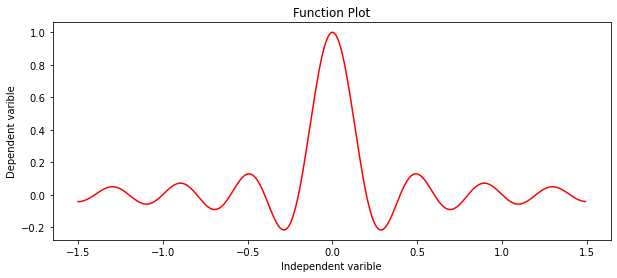

In [ ]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

## Model 1

In [ ]:
class Model1(nn.Module):
    def __init__(self,):
        super(Model1, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 5)
        self.predict = nn.Linear(5, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))
        x = nn.functional.leaky_relu(self.linear5(x))
        x = nn.functional.leaky_relu(self.linear6(x))
        x = nn.functional.leaky_relu(self.linear7(x))

        x = self.predict(x)
        return x

model_1 = Model1()

In [ ]:
optimizer = torch.optim.RMSprop(model_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(model_1, x, y)

571
epoch: 500, loss = 0.0050
epoch: 1000, loss = 0.0028
epoch: 1500, loss = 0.0027
epoch: 2000, loss = 0.0028
epoch: 2500, loss = 0.0028
epoch: 3000, loss = 0.0029
epoch: 3500, loss = 0.0027
epoch: 4000, loss = 0.0028
epoch: 4500, loss = 0.0027
epoch: 5000, loss = 0.0022
epoch: 5500, loss = 0.0024
epoch: 6000, loss = 0.0020
epoch: 6500, loss = 0.0020
epoch: 7000, loss = 0.0020
epoch: 7500, loss = 0.0017
epoch: 8000, loss = 0.0017
epoch: 8500, loss = 0.0019
epoch: 9000, loss = 0.0016
epoch: 9500, loss = 0.0015
epoch: 10000, loss = 0.0016
epoch: 10500, loss = 0.0018
epoch: 11000, loss = 0.0014
epoch: 11500, loss = 0.0015
epoch: 12000, loss = 0.0015
epoch: 12500, loss = 0.0014
epoch: 13000, loss = 0.0013
epoch: 13500, loss = 0.0016
epoch: 14000, loss = 0.0020
epoch: 14500, loss = 0.0019
epoch: 15000, loss = 0.0012
epoch: 15500, loss = 0.0011
epoch: 16000, loss = 0.0011
Convergence reached for loss: 0.0009975171


## Model 2

In [ ]:
class Model2(nn.Module):
    def __init__(self,):
        super(Model2, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.linear2 = nn.Linear(10, 18)
        self.linear3 = nn.Linear(18, 15)
        self.linear4 = nn.Linear(15, 4)
        self.predict = nn.Linear(4, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))

        x = self.predict(x)
        return x

model_2 = Model2()

In [ ]:
optimizer = torch.optim.RMSprop(model_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_2.parameters())
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_2, x, y)

572
epoch: 500, loss = 0.0040
epoch: 1000, loss = 0.0026
epoch: 1500, loss = 0.0023
epoch: 2000, loss = 0.0018
epoch: 2500, loss = 0.0017
epoch: 3000, loss = 0.0015
epoch: 3500, loss = 0.0015
epoch: 4000, loss = 0.0015
epoch: 4500, loss = 0.0013
epoch: 5000, loss = 0.0013
epoch: 5500, loss = 0.0014
epoch: 6000, loss = 0.0012
epoch: 6500, loss = 0.0012
epoch: 7000, loss = 0.0012
epoch: 7500, loss = 0.0011
epoch: 8000, loss = 0.0011
epoch: 8500, loss = 0.0012
epoch: 9000, loss = 0.0010
Convergence reached for loss: 0.0009931606


## Model 3

In [ ]:
class Model3(nn.Module):
    def __init__(self,):
        super(Model3, self).__init__()
        self.linear1 = nn.Linear(1, 190)
        self.predict = nn.Linear(190, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))

        x = self.predict(x)
        return x

model_3 = Model3()

In [ ]:
optimizer = torch.optim.RMSprop(model_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_3.parameters())
print(pytorch_total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_3, x, y)

571
epoch: 500, loss = 0.0308
epoch: 1000, loss = 0.0220
epoch: 1500, loss = 0.0169
epoch: 2000, loss = 0.0138
epoch: 2500, loss = 0.0116
epoch: 3000, loss = 0.0101
epoch: 3500, loss = 0.0090
epoch: 4000, loss = 0.0082
epoch: 4500, loss = 0.0076
epoch: 5000, loss = 0.0071
epoch: 5500, loss = 0.0068
epoch: 6000, loss = 0.0065
epoch: 6500, loss = 0.0063
epoch: 7000, loss = 0.0060
epoch: 7500, loss = 0.0059
epoch: 8000, loss = 0.0057
epoch: 8500, loss = 0.0056
epoch: 9000, loss = 0.0054
epoch: 9500, loss = 0.0053
epoch: 10000, loss = 0.0053
epoch: 10500, loss = 0.0052
epoch: 11000, loss = 0.0050
epoch: 11500, loss = 0.0049
epoch: 12000, loss = 0.0048
epoch: 12500, loss = 0.0048
epoch: 13000, loss = 0.0047
epoch: 13500, loss = 0.0047
epoch: 14000, loss = 0.0046
epoch: 14500, loss = 0.0046
epoch: 15000, loss = 0.0045
epoch: 15500, loss = 0.0045
epoch: 16000, loss = 0.0045
epoch: 16500, loss = 0.0044
epoch: 17000, loss = 0.0044
epoch: 17500, loss = 0.0043
epoch: 18000, loss = 0.0042
epoch: 1

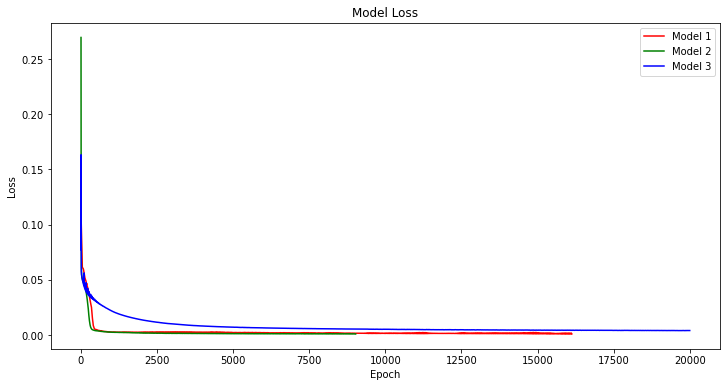

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "r")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "g")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

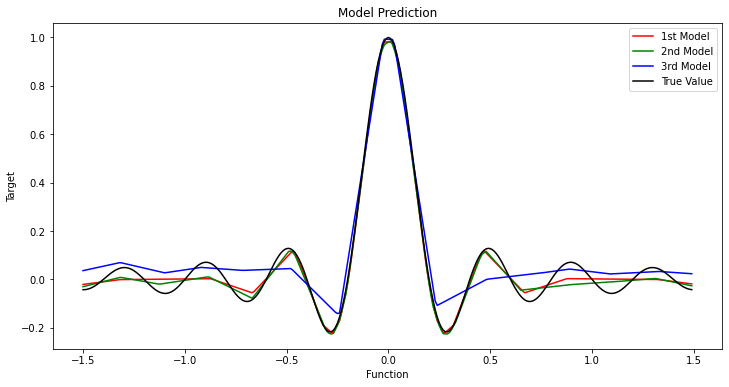

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_prediction.data, color="r", label = '1st Model')
plt.plot(x, m2_prediction.data, color="g", label = '2nd Model')
plt.plot(x, m3_prediction.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()

# Function 2

In [ ]:
torch.manual_seed(1)

In [ ]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
print(x.shape)
y = np.sign(np.sin(5*np.pi*x))
print(y.shape)

(300, 1)
(300, 1)


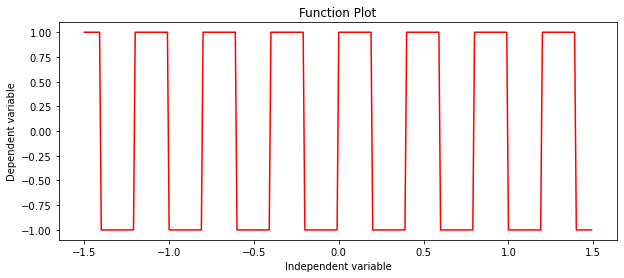

In [ ]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")

plt.title('Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

## Model 1

In [ ]:
model_sign_1 = Model1()
optimizer = torch.optim.Adam(model_sign_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_sign_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(model_sign_1, x, y)

571
epoch: 500, loss = 0.9994
epoch: 1000, loss = 0.6411
epoch: 1500, loss = 0.2702
epoch: 2000, loss = 0.1567
epoch: 2500, loss = 0.1149
epoch: 3000, loss = 0.0986
epoch: 3500, loss = 0.0881
epoch: 4000, loss = 0.0877
epoch: 4500, loss = 0.0775
epoch: 5000, loss = 0.0745
epoch: 5500, loss = 0.0717
epoch: 6000, loss = 0.0703
epoch: 6500, loss = 0.0675
epoch: 7000, loss = 0.0657
epoch: 7500, loss = 0.0644
epoch: 8000, loss = 0.0632
epoch: 8500, loss = 0.0718
epoch: 9000, loss = 0.0644
epoch: 9500, loss = 0.0828
epoch: 10000, loss = 0.0601
epoch: 10500, loss = 0.0599
epoch: 11000, loss = 0.0588
epoch: 11500, loss = 0.0641
epoch: 12000, loss = 0.0578
epoch: 12500, loss = 0.0586
epoch: 13000, loss = 0.0585
epoch: 13500, loss = 0.0580
epoch: 14000, loss = 0.0667
epoch: 14500, loss = 0.0796
epoch: 15000, loss = 0.0588
epoch: 15500, loss = 0.0576
epoch: 16000, loss = 0.0547
epoch: 16500, loss = 0.0560
epoch: 17000, loss = 0.0544
epoch: 17500, loss = 0.0571
epoch: 18000, loss = 0.0532
epoch: 1

## Model 2

In [ ]:
model_sign_2 = Model2()
optimizer = torch.optim.Adam(model_sign_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_2.parameters())
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_sign_2, x, y)

572
epoch: 500, loss = 0.9944
epoch: 1000, loss = 0.6665
epoch: 1500, loss = 0.3484
epoch: 2000, loss = 0.2367
epoch: 2500, loss = 0.1923
epoch: 3000, loss = 0.1840
epoch: 3500, loss = 0.1728
epoch: 4000, loss = 0.1694
epoch: 4500, loss = 0.1667
epoch: 5000, loss = 0.1648
epoch: 5500, loss = 0.1637
epoch: 6000, loss = 0.1610
epoch: 6500, loss = 0.1599
epoch: 7000, loss = 0.1582
epoch: 7500, loss = 0.1565
epoch: 8000, loss = 0.1572
epoch: 8500, loss = 0.1537
epoch: 9000, loss = 0.1525
epoch: 9500, loss = 0.1512
epoch: 10000, loss = 0.1505
epoch: 10500, loss = 0.1497
epoch: 11000, loss = 0.1485
epoch: 11500, loss = 0.1488
epoch: 12000, loss = 0.1470
epoch: 12500, loss = 0.1453
epoch: 13000, loss = 0.1436
epoch: 13500, loss = 0.1441
epoch: 14000, loss = 0.1397
epoch: 14500, loss = 0.1403
epoch: 15000, loss = 0.1308
epoch: 15500, loss = 0.1313
epoch: 16000, loss = 0.1281
epoch: 16500, loss = 0.1352
epoch: 17000, loss = 0.1263
epoch: 17500, loss = 0.1255
epoch: 18000, loss = 0.1245
epoch: 1

## Model 3

In [ ]:
model_sign_3 = Model3()
optimizer = torch.optim.Adam(model_sign_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_3.parameters())
print(pytorch_total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_sign_3, x, y)

571
epoch: 500, loss = 0.9100
epoch: 1000, loss = 0.6977
epoch: 1500, loss = 0.5176
epoch: 2000, loss = 0.4005
epoch: 2500, loss = 0.3299
epoch: 3000, loss = 0.2890
epoch: 3500, loss = 0.2649
epoch: 4000, loss = 0.2496
epoch: 4500, loss = 0.2397
epoch: 5000, loss = 0.2328
epoch: 5500, loss = 0.2277
epoch: 6000, loss = 0.2234
epoch: 6500, loss = 0.2198
epoch: 7000, loss = 0.2165
epoch: 7500, loss = 0.2127
epoch: 8000, loss = 0.2104
epoch: 8500, loss = 0.2085
epoch: 9000, loss = 0.2070
epoch: 9500, loss = 0.2053
epoch: 10000, loss = 0.2041
epoch: 10500, loss = 0.2029
epoch: 11000, loss = 0.2013
epoch: 11500, loss = 0.2002
epoch: 12000, loss = 0.1993
epoch: 12500, loss = 0.1985
epoch: 13000, loss = 0.1977
epoch: 13500, loss = 0.1970
epoch: 14000, loss = 0.1964
epoch: 14500, loss = 0.1956
epoch: 15000, loss = 0.1947
epoch: 15500, loss = 0.1942
epoch: 16000, loss = 0.1936
epoch: 16500, loss = 0.1930
epoch: 17000, loss = 0.1897
epoch: 17500, loss = 0.1883
epoch: 18000, loss = 0.1870
epoch: 1

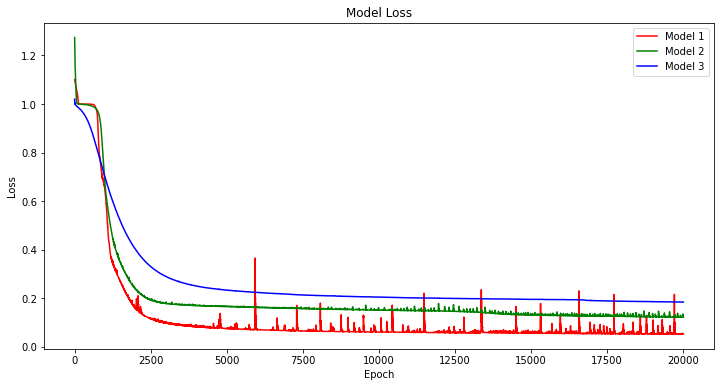

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "r")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "g")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

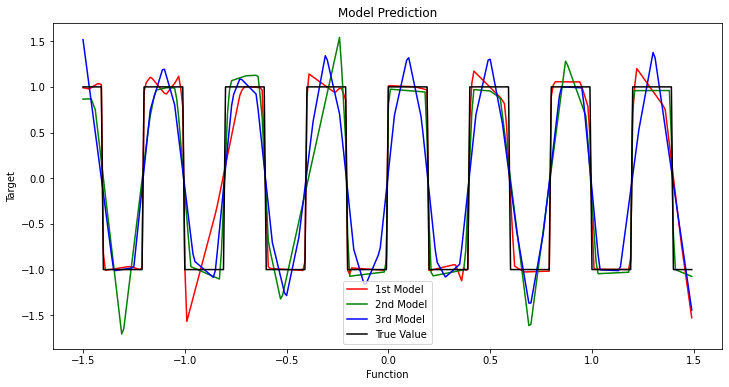

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_prediction.data, color="r", label = '1st Model')
plt.plot(x, m2_prediction.data, color="g", label = '2nd Model')
plt.plot(x, m3_prediction.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()